In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from pandas import DataFrame
plt.rcParams["figure.figsize"] = (12,8)

In [2]:
sigmoid = lambda x: 1/(1 + np.exp(-x))

In [3]:
def plot_model(model, feature_lambda, title):
    xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 200), np.linspace(-1.5, 1.5, 200))
    inputs_xy = np.array([feature_lambda(xx_val, yy_val) for xx_val, yy_val in zip(xx.flatten(), yy.flatten())])
    prediction = model(inputs_xy).numpy()
    Z = prediction.reshape(xx.shape)
    df = DataFrame(dict(x=xy[:, 0], y=xy[:, 1], label=labels.flatten()))
    colors = {0: 'red', 1: 'blue'}
    markers = {0: 'bs', 1: 'r^'}
    _, ax = plt.subplots(figsize=(5, 5))
    ax.contourf(xx, yy, Z, 5, cmap='jet', alpha=.9)
    cs = ax.contour(xx, yy, Z, cmap='gray', levels=[0, 0.5, 1.0], linestyles='--', linewidths=2)
    ax.clabel(cs, colors='k')
    grouped = df.groupby('label')
    for k, xy0 in df[['x', 'y', 'label']].iterrows():
        x0, y0, label = xy0.values
        plt.plot(x0, y0, markers[int(label)], mec='k', alpha=0.6)
    ax.set_xlim([-1.3, 1.3])
    ax.set_ylim([-1.3, 1.3])
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.show()

In [4]:
def generate_batches(batch_size, features, labels):
    outout_batches = []
    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        outout_batches.append(batch)
    return outout_batches

# CheckerBoard

다음 데이터를 잘 분류하는 이항 분류 모델을 찾으시오.

In [5]:
np.random.seed(410)
xy = np.random.uniform(-1,1, (200,2))
labels = np.zeros((200), dtype=np.int32)
labels[xy[:,0] * xy[:,1] > 0] = 1

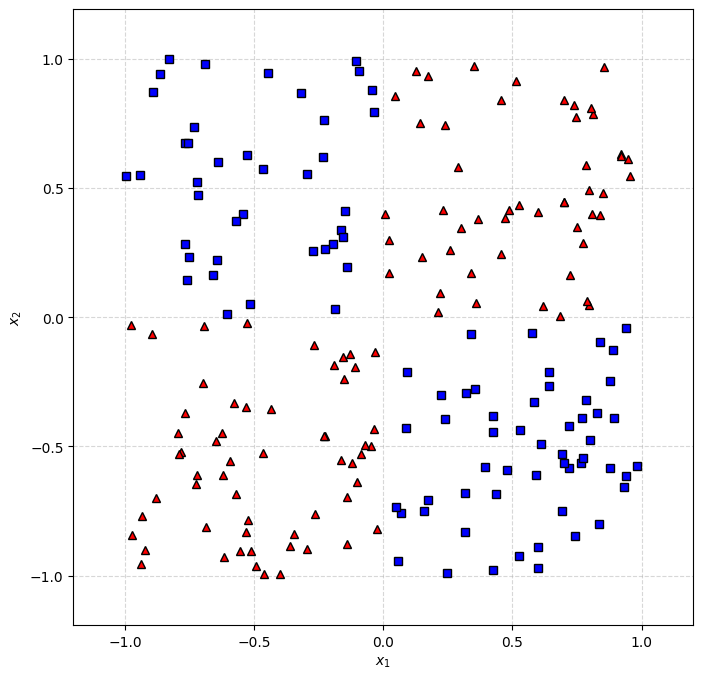

In [6]:
df = DataFrame(dict(x=xy[:,0], y=xy[:,1], label=labels.flatten()))
colors = {0:'red', 1:'blue'}
_, ax = plt.subplots(figsize=(8, 8))
grouped = df.groupby('label')
markers = {0:'bs', 1:'r^'}
for k, xy0 in df[['x', 'y']].iterrows():
    x0, y0 = xy0.values
    plt.plot(x0, y0, markers[labels[k]], mec='k')
plt.axis('equal')
plt.grid(linestyle='--', alpha=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])
plt.show()

Epoch 1/50 - Loss: 0.6942 - Accuracy: 0.5800
Epoch 2/50 - Loss: 0.6818 - Accuracy: 0.7000
Epoch 3/50 - Loss: 0.6703 - Accuracy: 0.7750
Epoch 4/50 - Loss: 0.6600 - Accuracy: 0.7700
Epoch 5/50 - Loss: 0.6494 - Accuracy: 0.7750
Epoch 6/50 - Loss: 0.6397 - Accuracy: 0.7700
Epoch 7/50 - Loss: 0.6297 - Accuracy: 0.7700
Epoch 8/50 - Loss: 0.6204 - Accuracy: 0.7600
Epoch 9/50 - Loss: 0.6113 - Accuracy: 0.8000
Epoch 10/50 - Loss: 0.6021 - Accuracy: 0.8400
Epoch 11/50 - Loss: 0.5933 - Accuracy: 0.8500
Epoch 12/50 - Loss: 0.5846 - Accuracy: 0.8600
Epoch 13/50 - Loss: 0.5760 - Accuracy: 0.8600
Epoch 14/50 - Loss: 0.5675 - Accuracy: 0.8750
Epoch 15/50 - Loss: 0.5591 - Accuracy: 0.9000
Epoch 16/50 - Loss: 0.5508 - Accuracy: 0.9150
Epoch 17/50 - Loss: 0.5425 - Accuracy: 0.9250
Epoch 18/50 - Loss: 0.5343 - Accuracy: 0.9300
Epoch 19/50 - Loss: 0.5259 - Accuracy: 0.9300
Epoch 20/50 - Loss: 0.5175 - Accuracy: 0.9250
Epoch 21/50 - Loss: 0.5094 - Accuracy: 0.9350
Epoch 22/50 - Loss: 0.5007 - Accuracy: 0.94

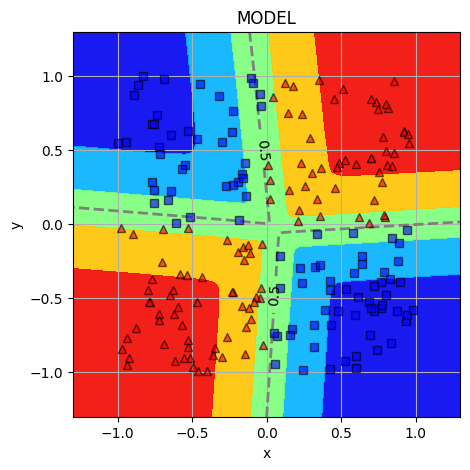

In [7]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.dense1 = layers.Dense(64, activation='relu')
        self.dense2 = layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        x = self.dense1(inputs)
        return self.dense2(x)

model = MyModel()

# Adam 옵티마이저와 이진 교차 엔트로피 손실을 사용하여 모델 컴파일
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 지정된 배치 크기로 모델 훈련 및 각 epoch에서 손실 출력
batch_size = 32
for epoch in range(50):
    history = model.fit(xy, labels, epochs=1, batch_size=batch_size, verbose=0)
    loss = history.history['loss'][0]
    accuracy = history.history['accuracy'][0]
    print(f'Epoch {epoch + 1}/{50} - Loss: {loss:.4f} - Accuracy: {accuracy:.4f}')

# plot_model 함수를 사용하여 모델 시각화
plot_model(model, lambda x, y: [x, y], 'MODEL')


In [8]:
from sklearn.datasets import make_blobs
# 불규칙 데이터 생성
xy, labels = make_blobs(n_samples=200, center_box=(-1,1), centers=6,cluster_std=0.1, random_state=20)
labels = labels % 2
labels = labels.reshape(-1,1)

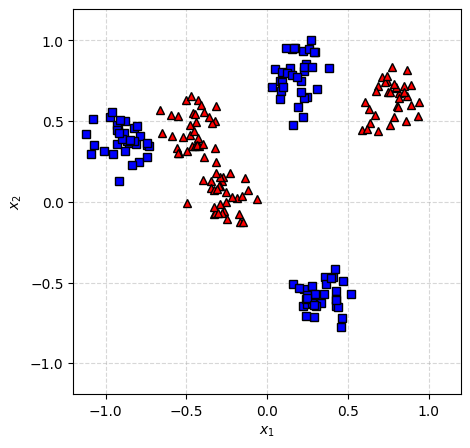

In [9]:
df = DataFrame(dict(x=xy[:,0], y=xy[:,1], label=labels.flatten()))
colors = {0:'red', 1:'blue'}
_, ax = plt.subplots(figsize=(5, 5))
grouped = df.groupby('label')
markers = {0:'bs', 1:'r^'}
for k, xy0 in df[['x', 'y']].iterrows():
    x0, y0 = xy0.values
    plt.plot(x0, y0, markers[labels[k][0]], mec='k')
plt.axis('equal')
plt.grid(linestyle='--', alpha=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])
# plt.legend([0, 1])
plt.show()

Epoch 1/50 - Loss: 0.6998 - Accuracy: 0.6000
Epoch 2/50 - Loss: 0.6919 - Accuracy: 0.6150
Epoch 3/50 - Loss: 0.6840 - Accuracy: 0.6400
Epoch 4/50 - Loss: 0.6777 - Accuracy: 0.5750
Epoch 5/50 - Loss: 0.6715 - Accuracy: 0.6600
Epoch 6/50 - Loss: 0.6653 - Accuracy: 0.7200
Epoch 7/50 - Loss: 0.6598 - Accuracy: 0.7200
Epoch 8/50 - Loss: 0.6539 - Accuracy: 0.7150
Epoch 9/50 - Loss: 0.6487 - Accuracy: 0.7150
Epoch 10/50 - Loss: 0.6434 - Accuracy: 0.7150
Epoch 11/50 - Loss: 0.6383 - Accuracy: 0.7150
Epoch 12/50 - Loss: 0.6332 - Accuracy: 0.7300
Epoch 13/50 - Loss: 0.6280 - Accuracy: 0.7250
Epoch 14/50 - Loss: 0.6232 - Accuracy: 0.7250
Epoch 15/50 - Loss: 0.6185 - Accuracy: 0.7050
Epoch 16/50 - Loss: 0.6134 - Accuracy: 0.6950
Epoch 17/50 - Loss: 0.6090 - Accuracy: 0.7000
Epoch 18/50 - Loss: 0.6044 - Accuracy: 0.6950
Epoch 19/50 - Loss: 0.6000 - Accuracy: 0.7100
Epoch 20/50 - Loss: 0.5953 - Accuracy: 0.7100
Epoch 21/50 - Loss: 0.5914 - Accuracy: 0.7100
Epoch 22/50 - Loss: 0.5871 - Accuracy: 0.72

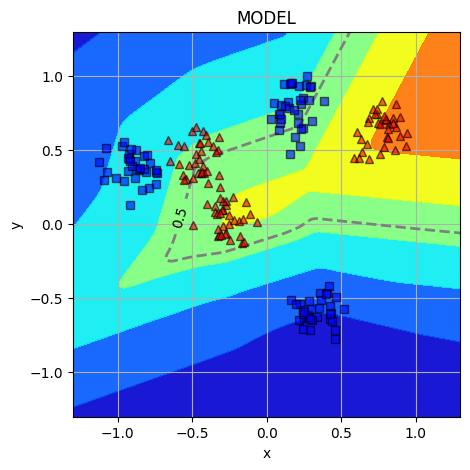

In [10]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.dense1 = layers.Dense(64, activation='relu')
        self.dense2 = layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        x = self.dense1(inputs)
        return self.dense2(x)

model = MyModel()

# Adam 옵티마이저와 이진 교차 엔트로피 손실을 사용하여 모델 컴파일
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 지정된 배치 크기로 모델 훈련하고 각 epoch에서 손실 출력
batch_size = 32  
for epoch in range(50):
    history = model.fit(xy, labels, epochs=1, batch_size=batch_size, verbose=0)
    loss = history.history['loss'][0]
    accuracy = history.history['accuracy'][0]
    print(f'Epoch {epoch + 1}/{50} - Loss: {loss:.4f} - Accuracy: {accuracy:.4f}')

# plot_model 함수를 사용하여 모델 시각화
plot_model(model, lambda x, y: [x, y], 'MODEL')
